In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

tps = pd.read_csv(
    "/data/tsq/CK/pic/avg_HC3_all_pearson_corr_feats.csv", parse_dates=["time"]
)
print(tps.shape)
print(tps.columns)
print(len(tps))

(98000, 245)
Index(['Unnamed: 0', 'WRich05_S', 'WRich10_S', 'WRich15_S', 'WRich20_S',
       'WClar05_S', 'WClar10_S', 'WClar15_S', 'WClar20_S', 'WNois05_S',
       ...
       'rouge-1-p', 'rouge-1-r', 'rouge-1-f', 'rouge-2-p', 'rouge-2-r',
       'rouge-2-f', 'rouge-l-p', 'rouge-l-r', 'rouge-l-f', 'time'],
      dtype='object', length=245)
98000


In [28]:
if len(tps) > 90000:
    gps = tps.groupby("time").agg('mean').drop("Unnamed: 0", axis=1).drop(['04-21'],axis=0)
    # gps = tps.groupby("time").agg('mean').drop("Unnamed: 0", axis=1)
else:
    gps = tps.groupby("time").agg('mean').drop("Unnamed: 0", axis=1)
# gps = tps.groupby("time").agg('mean').drop("Unnamed: 0", axis=1).iloc[46:50,:]
# gps = tps.groupby("time").agg('mean').drop("Unnamed: 0", axis=1)
# print(gps)
print(gps.shape)
print(gps.columns)

gps_corr_matrix = gps.corr(method="pearson")
# print(gps_corr_matrix[gps_corr_matrix.columns[240]])
specific_col = gps_corr_matrix[gps_corr_matrix.columns[242]]
print("#########")
print(specific_col)
print(specific_col.idxmax())
df_sorted = specific_col.sort_values(ascending=False)
# df_without_max = specific_col[specific_col != specific_col.max()]
print("#########")
print(df_sorted.shape)
print(df_sorted.head(6))
# print('The row number of the max value in the column is: ', max_value_index)

# ['rouge-l-p', 'TokSenL_S', 'ra_SNTo_C', 'ra_XNTo_C', 'ra_CoFuW_C' ,'rouge-l-r', 'WTopc15_S', 'TokSenS_S', 'WTopc10_S', 'to_FuncW_C', 'rouge-l-f', 'ra_ONTo_C', 'ra_NOTo_C', 'at_AjPhr_C', 'as_SuPhr_C']

(97, 243)
Index(['WRich05_S', 'WRich10_S', 'WRich15_S', 'WRich20_S', 'WClar05_S',
       'WClar10_S', 'WClar15_S', 'WClar20_S', 'WNois05_S', 'WNois10_S',
       ...
       'ppl', 'rouge-1-p', 'rouge-1-r', 'rouge-1-f', 'rouge-2-p', 'rouge-2-r',
       'rouge-2-f', 'rouge-l-p', 'rouge-l-r', 'rouge-l-f'],
      dtype='object', length=243)
#########
WRich05_S   -0.283112
WRich10_S   -0.365276
WRich15_S   -0.398322
WRich20_S   -0.408339
WClar05_S   -0.344211
               ...   
rouge-2-r   -0.034875
rouge-2-f    0.584513
rouge-l-p    0.624254
rouge-l-r   -0.284985
rouge-l-f    1.000000
Name: rouge-l-f, Length: 243, dtype: float64
rouge-l-f
#########
(243,)
rouge-l-f     1.000000
rouge-1-f     0.903338
ra_ONTo_C     0.738384
ra_NOTo_C     0.684909
at_AjPhr_C    0.670439
as_SuPhr_C    0.668745
Name: rouge-l-f, dtype: float64


Text(0, 0.5, 'rouge-l-p')

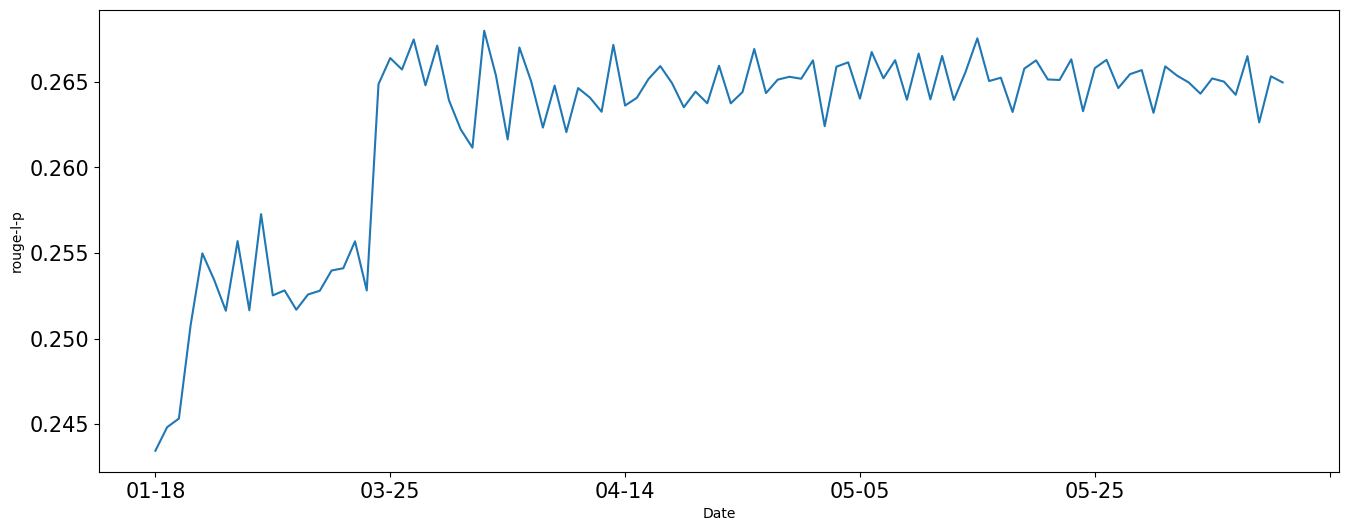

In [4]:
gps["rouge-l-p"].plot(figsize=(16, 6), fontsize=15)
plt.xlabel("Date")
plt.ylabel("rouge-l-p")


Working with multiple time series presents certain challenges. One example, as we saw, is the different **scales** each distribution comes in:

Text(0, 0.5, 'Raw score')

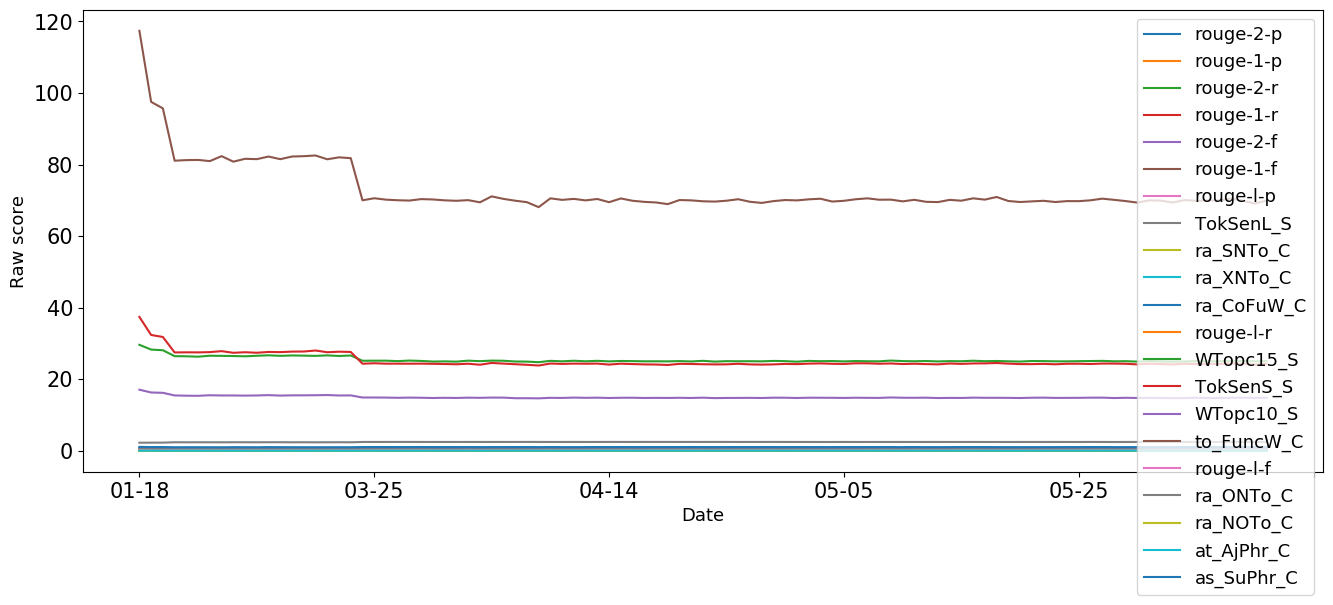

In [29]:
# for v1
drop_cols = gps.columns[3:230]
drop_df = gps.drop(drop_cols, axis=1)
# for v2
# feature_cols = ['rouge-l-p', 'TokSenL_S', 'rouge-l-r', 'WTopc15_S', 'rouge-l-f', 'ra_ONTo_C']
# feature_cols = ['rouge-l-p', 'TokSenL_S', 'ra_SNTo_C', 'ra_XNTo_C' ,'rouge-l-r', 'WTopc15_S', 'TokSenS_S', 'WTopc10_S', 'rouge-l-f', 'ra_ONTo_C', 'ra_NOTo_C', 'at_AjPhr_C']
feature_cols = ['rouge-l-p', 'TokSenL_S', 'ra_SNTo_C', 'ra_XNTo_C', 'ra_CoFuW_C' ,'rouge-l-r', 'WTopc15_S', 'TokSenS_S', 'WTopc10_S', 'to_FuncW_C', 'rouge-l-f', 'ra_ONTo_C', 'ra_NOTo_C', 'at_AjPhr_C', 'as_SuPhr_C']
sel_cols = ["rouge-2-p", "rouge-1-p", "rouge-2-r","rouge-1-r", "rouge-2-f", "rouge-1-f"] + feature_cols
drop_df_v2 = gps[sel_cols]
drop_df_v2.plot(figsize=(16, 6), fontsize=15)

plt.xlabel("Date")
plt.ylabel("Raw score")

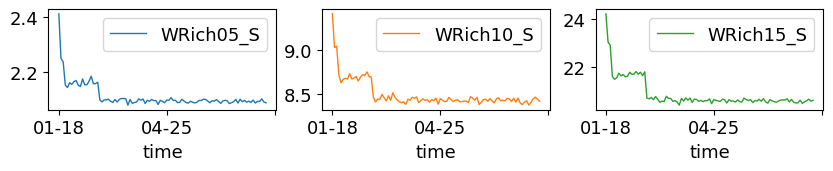

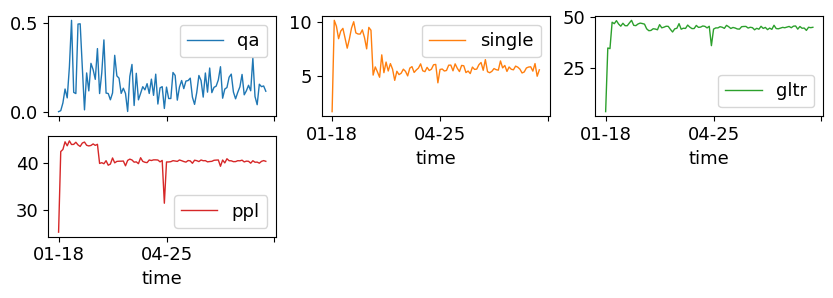

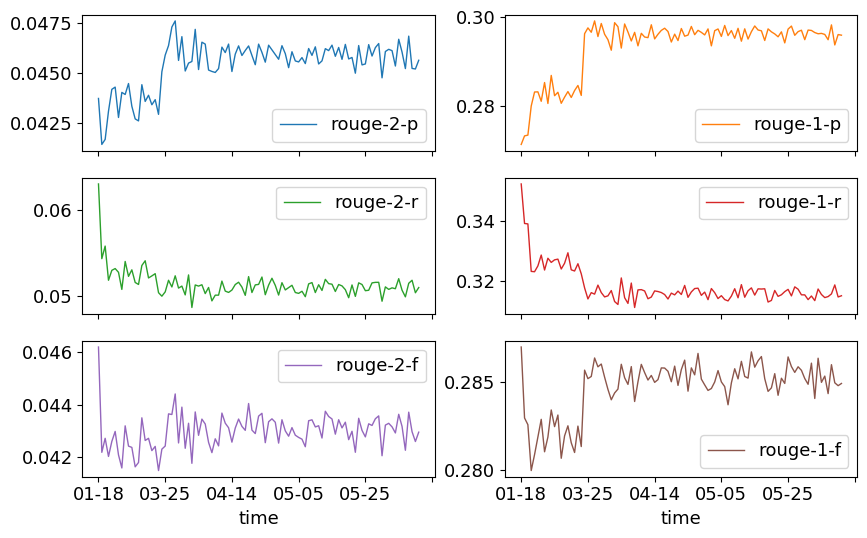

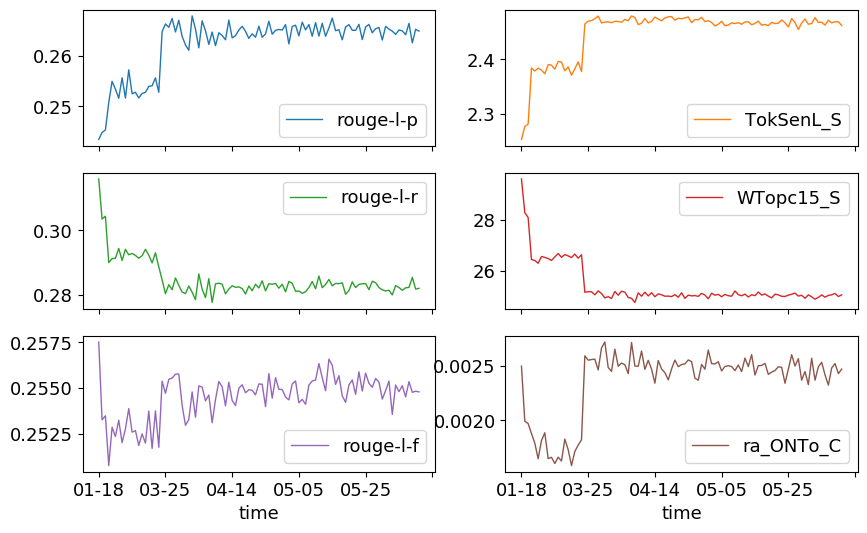

In [30]:
# linguistic feature
drop_df[gps.columns[:3]].plot(subplots=True, layout=(4, 3), linewidth=1)
# classify feature
drop_df[gps.columns[230:234]].plot(subplots=True, layout=(4, 3), linewidth=1)
# rouge score
v1_cols = ["rouge-2-r", "rouge-l-r", "rouge-2-p",
           "rouge-l-p", "rouge-2-f", "rouge-l-f"]
wrich_cols = ["WRich05_S", "rouge-l-r", "WRich10_S", "rouge-l-p", "WRich15_S", "rouge-l-f"]
plt.rcParams.update({'font.size': 13})
v2_cols = ["rouge-2-p", "rouge-1-p", "rouge-2-r","rouge-1-r", "rouge-2-f", "rouge-1-f"]
drop_df[v2_cols].plot(subplots=True, layout=(3, 2), linewidth=1,legend=True)
plt.savefig("/home/tsq/ChatLog/pics/rouge_v2.pdf", bbox_inches='tight')
# another correlation
rouge_cols = ['rouge-l-p', 'TokSenL_S', 'rouge-l-r', 'WTopc15_S', 'rouge-l-f', 'ra_ONTo_C']
# drop_df[wrich_cols].plot(subplots=True, layout=(3, 2), linewidth=1,legend=True)
gps[rouge_cols].plot(subplots=True, layout=(3, 2), linewidth=1,legend=True)
plt.savefig("/home/tsq/ChatLog/pics/rouge_WRich_font13_v2.pdf", bbox_inches='tight')


## Solution: normalization
When normalizing time series, you divide every data point in the distribution by the first sample. This has the effect of representing every single data point as the percentage increase relative to the first sample:


Text(0, 0.5, 'Increase (%)')

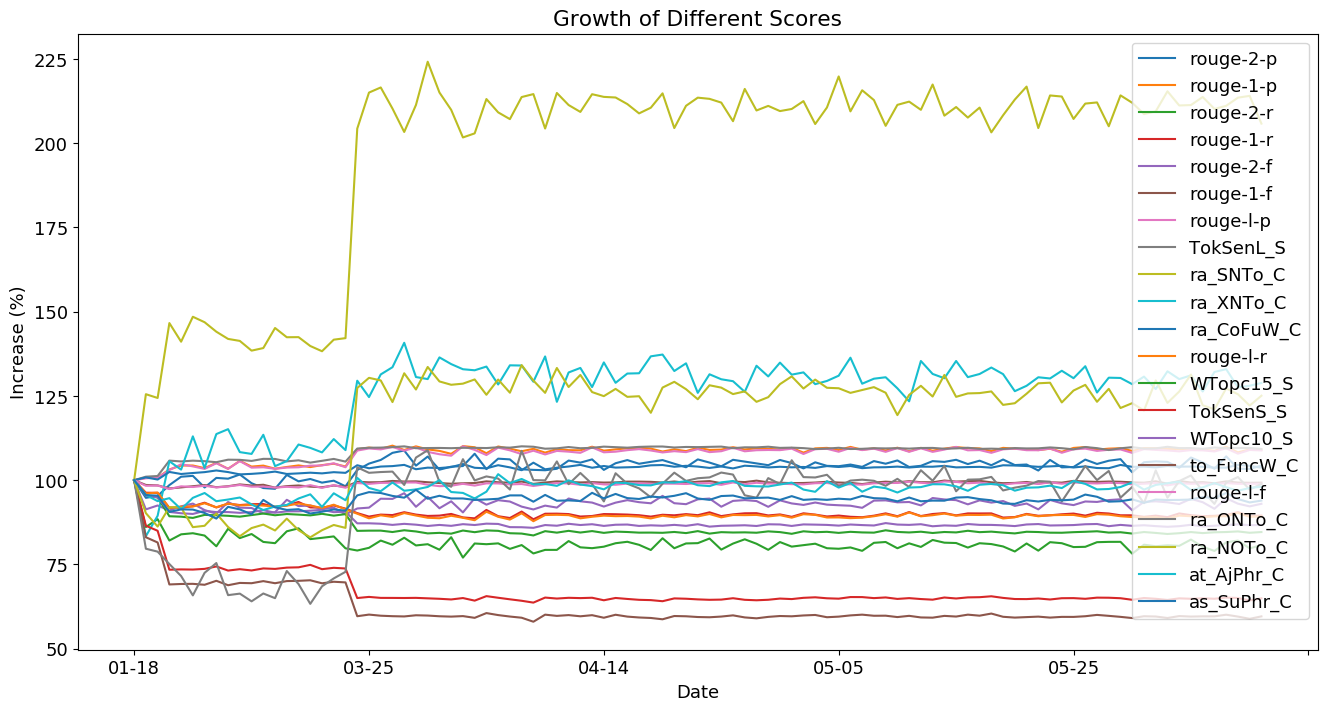

In [31]:
# normalized = drop_df.div(drop_df.iloc[0]).mul(100)  # Multiply by 100 to get percentages
normalized = drop_df_v2.div(drop_df_v2.iloc[0]).mul(100)  # Multiply by 100 to get percentages

normalized.plot(figsize=(16, 8),
                title="Growth of Different Scores")
plt.xlabel("Date")
plt.ylabel("Increase (%)")



Text(0, 0.5, 'Increase (%)')

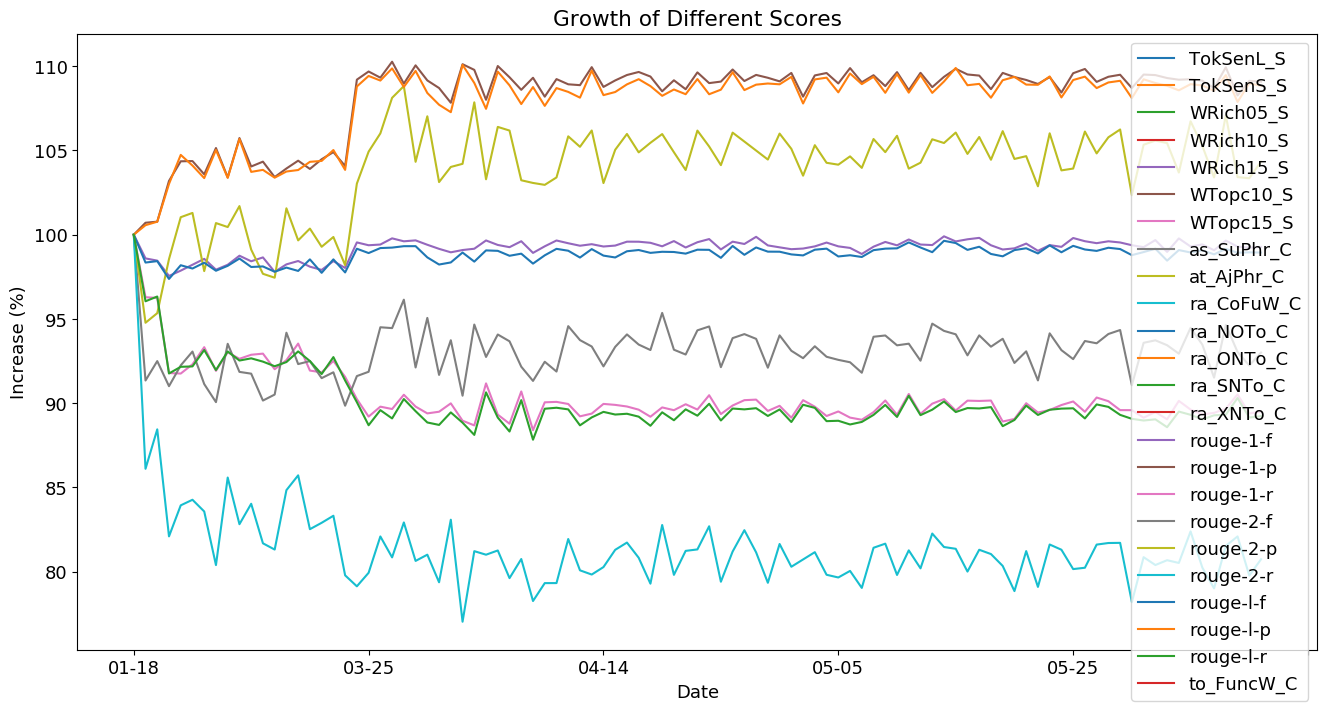

In [32]:
new_drop_df = drop_df.drop(["qa", "gltr", "ppl", "single"], axis=1)
# new_normalized = new_drop_df.div(new_drop_df.iloc[0]).mul(100)  # Multiply by 100 to get percentages

new_normalized = drop_df_v2.div(new_drop_df.iloc[0]).mul(100)  # Multiply by 100 to get percentages

new_normalized.plot(figsize=(16, 8),
                    title="Growth of Different Scores")
plt.xlabel("Date")
plt.ylabel("Increase (%)")


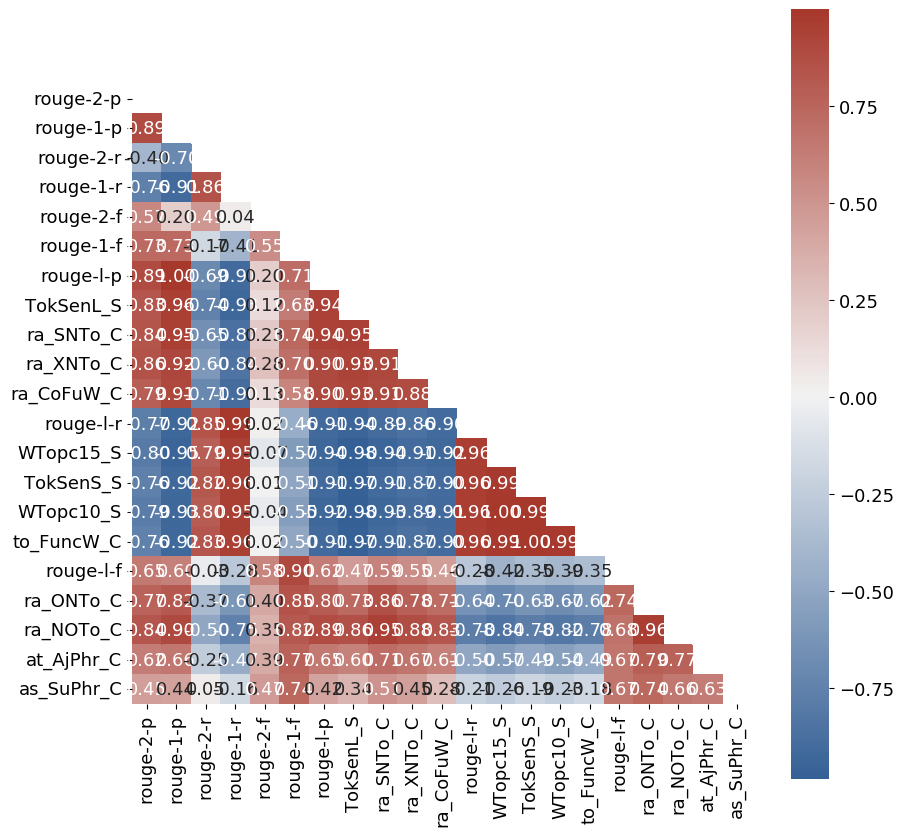

            rouge-2-p  rouge-1-p  rouge-2-r  rouge-1-r  rouge-2-f  rouge-1-f  \
rouge-2-p    1.000000   0.892619  -0.401147  -0.763321   0.565968   0.729180   
rouge-1-p    0.892619   1.000000  -0.697467  -0.911512   0.203278   0.729511   
rouge-2-r   -0.401147  -0.697467   1.000000   0.859873   0.493983  -0.169916   
rouge-1-r   -0.763321  -0.911512   0.859873   1.000000   0.040265  -0.414050   
rouge-2-f    0.565968   0.203278   0.493983   0.040265   1.000000   0.549862   
rouge-1-f    0.729180   0.729511  -0.169916  -0.414050   0.549862   1.000000   
rouge-l-p    0.892312   0.995358  -0.694252  -0.911398   0.201681   0.710092   
TokSenL_S    0.831447   0.955060  -0.743968  -0.931617   0.124916   0.628355   
ra_SNTo_C    0.840841   0.954506  -0.654386  -0.872684   0.225558   0.740505   
ra_XNTo_C    0.857280   0.917564  -0.597387  -0.837458   0.278512   0.699962   
ra_CoFuW_C   0.792940   0.906605  -0.711605  -0.895577   0.131237   0.583250   
rouge-l-r   -0.771646  -0.922355   0.851

In [33]:
# Create a custom palette
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
# Compute corr matrix
matrix = drop_df_v2.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, mask=mask, square=True, cmap=cmap, annot=True, fmt=".2f", ax=ax)
plt.show()
print(matrix)

Use normalized matrix will get the same correlation:
$r = \frac{\sum_{i=1}^n(x_i -\bar{x})(y_i -\bar{y})}{\sqrt{\sum_{i=1}^n(x_i -\bar{x})^2 }\sqrt{\sum_{i=1}^n(y_i -\bar{y})^2}}$

            rouge-l-p  TokSenL_S  ra_SNTo_C  ra_XNTo_C  ra_CoFuW_C  rouge-l-r  \
rouge-l-p    1.000000   0.942977   0.941359   0.902490    0.902268  -0.912852   
TokSenL_S    0.942977   1.000000   0.949456   0.934942    0.928520  -0.944213   
ra_SNTo_C    0.941359   0.949456   1.000000   0.909578    0.905999  -0.892045   
ra_XNTo_C    0.902490   0.934942   0.909578   1.000000    0.883782  -0.857163   
ra_CoFuW_C   0.902268   0.928520   0.905999   0.883782    1.000000  -0.900181   
rouge-l-r   -0.912852  -0.944213  -0.892045  -0.857163   -0.900181   1.000000   
WTopc15_S   -0.936137  -0.983365  -0.944031  -0.905267   -0.918181   0.962367   
TokSenS_S   -0.910730  -0.974586  -0.908799  -0.873683   -0.902861   0.962358   
WTopc10_S   -0.924646  -0.977146  -0.931039  -0.891656   -0.906975   0.961783   
to_FuncW_C  -0.908219  -0.969209  -0.906444  -0.866052   -0.904872   0.961530   
rouge-l-f    0.624254   0.468445   0.589661   0.547027    0.461306  -0.284985   
ra_ONTo_C    0.801706   0.73

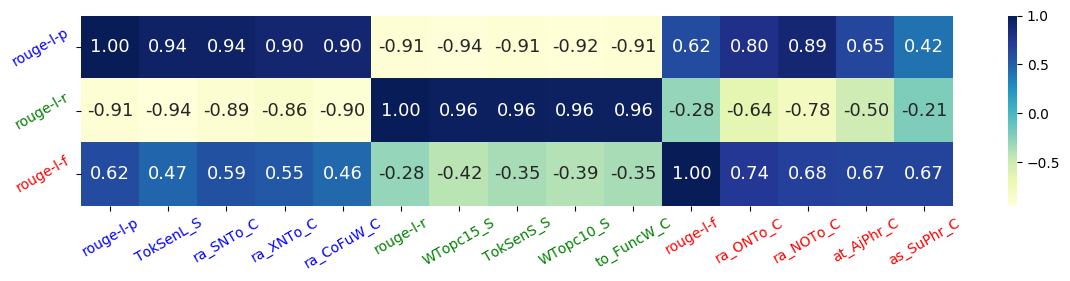

In [35]:
new_normalized1 = normalized.drop(["rouge-1-r", "rouge-1-p", "rouge-1-f",
                                       "rouge-2-r", "rouge-2-p", "rouge-2-f"], axis=1)
norm_matrix = new_normalized1.corr(method="pearson")
print(norm_matrix)
# Create a mask
# mask = np.triu(np.ones_like(norm_matrix, dtype=bool))
mask_rows = [0, 4, 8]
row_names = ['rouge-l-p', 'rouge-l-r', 'rouge-l-f']
mask = np.ones_like(norm_matrix, dtype=bool)
for i in mask_rows:
    mask[i,:] = False
print(mask)
fig, ax = plt.subplots(figsize=(12, 3))
colormap = sns.cubehelix_palette(start=2.8, rot=0.1, gamma=0.2, dark=-0.0, light=0.95, as_cmap=True)
# sns.heatmap(norm_matrix.loc[row_names], square=True, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={"orientation":"horizontal","shrink":1}, ax=ax)
sns.heatmap(norm_matrix.loc[row_names], square=False, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True,  ax=ax)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=10)

# ax.set_title('Spearman\'s ρ between datasets with model performance as variables', fontsize=20)
ax.tick_params(labelsize=10, rotation=30)
colors=['blue']*5 + ['green']*5 + ['red']*5
col_colors = ['blue', 'green', 'red']
[t.set_color(colors[i]) for i,t in enumerate(ax.xaxis.get_ticklabels())]
[t.set_color(col_colors[i]) for i,t in enumerate(ax.yaxis.get_ticklabels())]
plt.tight_layout()
plt.savefig("/home/tsq/ChatLog/pics/heat_map_v1.pdf", bbox_inches='tight')
plt.show()

/home/tsq/miniconda3/envs/blink37/lib/python3.7/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


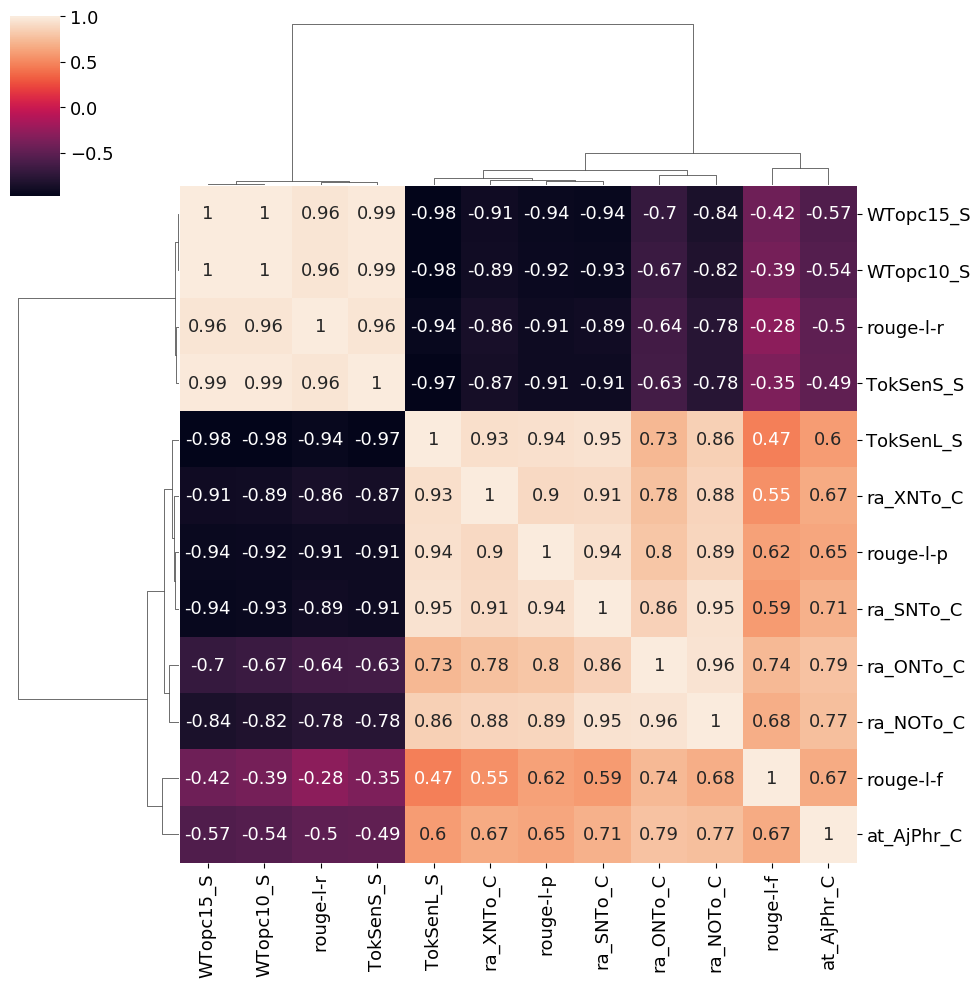

In [11]:
sns.clustermap(norm_matrix, annot=True, square=True)
plt.savefig("/home/tsq/ChatLog/pics/clustermap_v1.pdf", bbox_inches='tight')
plt.show()

## autocorrelation function plot
The XAxis of an autocorrelation function plot (ACF) is the lag number k. For example, when k=1, the correlation is found by shifting the series by 1. This is the same as using the shift function of Pandas:

The YAXis is the amount of correlation at each lag k. The shaded red region is a confidence interval — if the height of the bars is outside this region, it means the correlation is statistically significant.

Please pause and think of what you can learn from an ACF plot.

They offer an alternative way of detecting patterns and seasonality. For example, the ACF plot of temperature in Celcius shows that the correlation at every 15 lags decreases or every 25 lags increases.

When a clear trend exists in a time series, the autocorrelation tends to be high at small lags like 1 or 2. When seasonality exists, the autocorrelation goes up periodically at larger lags.

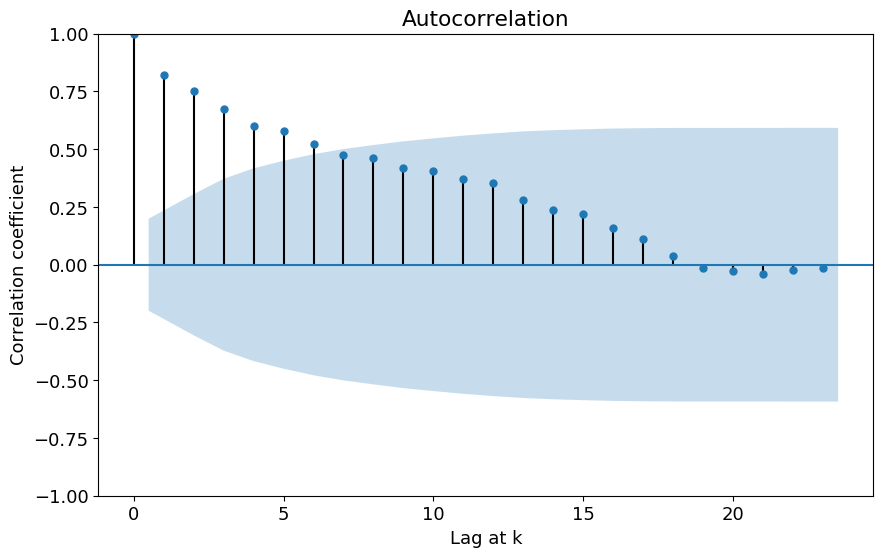

In [12]:
from matplotlib import rcParams
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(gps["rouge-l-p"], lags=23)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

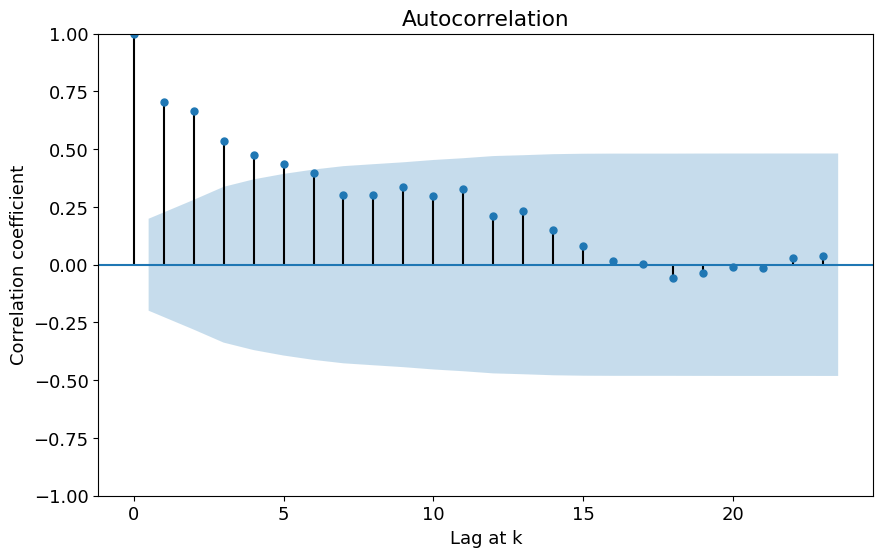

In [13]:
fig = tsaplots.plot_acf(gps["rouge-1-f"], lags=23)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()


In [14]:
# Mind the extra 'p' in plot_pacf
# fig = tsaplots.plot_pacf(gps["rouge-1-f"], lags=23)
#
# plt.title("Partial Autocorrelation of rouge-1-f")
# plt.xlabel("Lag at k")
# plt.ylabel("Correlation Coefficient")
# plt.show();